# Visualize RadonEye log file data

## List all available files

In [11]:
ls -l

total 316
-rwxrwxrwx 1 sylvia sylvia 116702 Jan  1 21:15  EvaluateLog.ipynb*
-rwxrwxrwx 1 sylvia sylvia  15228 Apr  1  2021 'RE22002111054_20210301 100921.txt'*
-rwxrwxrwx 1 sylvia sylvia    925 Jan  1 21:13  README.md*
-rwxrwxrwx 1 sylvia sylvia  22513 Jan  1 21:06  boxplot.pdf*
-rwxrwxrwx 1 sylvia sylvia  69884 Jan  1 21:16  boxplot.svg*
-rwxrwxrwx 1 sylvia sylvia  21948 Jan  1 21:06  lineplot.pdf*
-rwxrwxrwx 1 sylvia sylvia  59407 Jan  1 21:16  lineplot.svg*


In [12]:
import pandas as pd
import numpy as np
import re
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Filter all available log files in working directory

In [13]:
# regex
pat_file = re.compile('(RE[0-9]+)_([0-9]+ [0-9]+).txt')
files = []
matches = []
for f in os.listdir('.'):
    m=re.match(pat_file,f)
    if m is not None:
        files.append(f)
        matches.append(m)

for (f, m) in zip(files, matches):
    sn = m.group(1)
    date_time_obj = datetime.strptime(m.group(2), '%Y%m%d %H%M%S')
    print(f"file name: '{f}', serial No: '{sn}', date time: '{date_time_obj}'")


file name: 'RE22002111054_20210301 100921.txt', serial No: 'RE22002111054', date time: '2021-03-01 10:09:21'


In [14]:
# selecting the first file
file = files[0]
df = pd.read_csv(f, sep='\t')
display(df)

,FTLab Radon Data
Model Name:,Radon Eye
S/N:,RE22002111054
Unit:,Bq/m3
Time step:,1hour
Data No:,1576
...,...
1572),8
1573),8
1574),29
1575),71


In [15]:
display(df.head(8))

,FTLab Radon Data
Model Name:,Radon Eye
S/N:,RE22002111054
Unit:,Bq/m3
Time step:,1hour
Data No:,1576
1),48
2),43
3),42


In [16]:
# number of values
num = int(df.loc['Data No:'].values[0])
print(f"Number of measurements: '{num}'")

Number of measurements: '1576'


In [17]:
# get all indices that container measurement values
re_step = '([0-9]+)\\)'
#df_step = df.index.str.extract(re_step).dropna()
index_step = df.index.str.contains(re_step, regex=True)
index_step 

/tmp/ipykernel_78/871494263.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  index_step = df.index.str.contains(re_step, regex=True)


array([False, False, False, ...,  True,  True,  True])

## Setting the date time for each entry
File name containing data time is created on export and will there for correspond with data time of last measurement value.

In [18]:
df['date_time'] = np.nan
df_ = df.iloc[index_step,:]
df_ = df_.astype({'FTLab Radon Data':'int'})
for i, (index, row) in enumerate(df_.iterrows()):
    date_time = date_time_obj-timedelta(hours=num-1-i)
    df_.loc[index,'date_time'] = date_time
df_

,FTLab Radon Data,date_time
1),48,2020-12-25 19:09:21
2),43,2020-12-25 20:09:21
3),42,2020-12-25 21:09:21
4),59,2020-12-25 22:09:21
5),45,2020-12-25 23:09:21
...,...,...
1572),8,2021-03-01 06:09:21
1573),8,2021-03-01 07:09:21
1574),29,2021-03-01 08:09:21
1575),71,2021-03-01 09:09:21


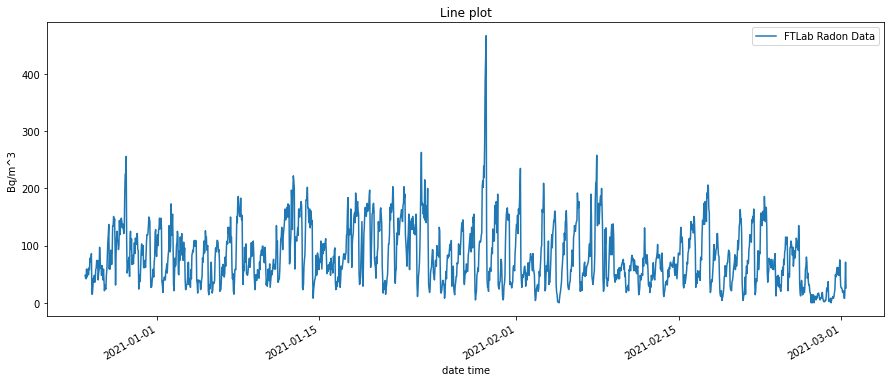

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
df_.plot.line(
    y='FTLab Radon Data',
    x='date_time',
    ax=ax, grid=False)
ax.set_xlabel("date time")
ax.set_ylabel("Bq/m^3")
ax.set_title("Line plot")
plt.show()

fig.savefig('lineplot.svg', facecolor='white', transparent=False)

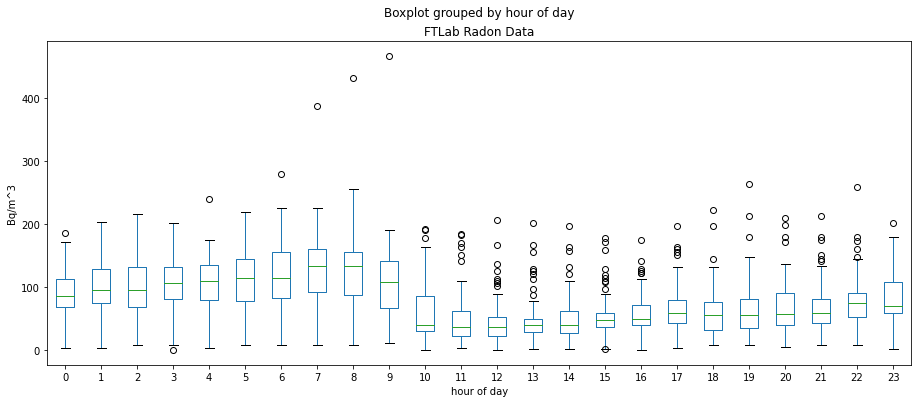

In [20]:
df_.set_index(df_.date_time, inplace=True)
df_['hour of day']= df_.index.hour

fig, ax = plt.subplots(figsize=(15,6))
df_.boxplot(by='hour of day', ax=ax, grid=False)
ax.set_xlabel("hour of day")
ax.set_ylabel("Bq/m^3")
plt.show()
fig.savefig('boxplot.svg', facecolor='white', transparent=False)